<a href="https://colab.research.google.com/github/Gabbers18/Python_Projects/blob/main/Coursework%20%20/Go_FundMe_Data_Visualization/GFM_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descriptive Stastics in Python Exercise - Module 1

In this exercise we will use a dataset related to a collection of individual fundraising campaigns created via the [GoFundMe](https://gofundme.com) website. The data comes from a [project on Github](https://github.com/lmeninato/GoFundMe/) which collected information about GoFundMe projects in 2018.

You will apply your knowledge of descriptive stastics and skills from the data wrangling course to summarize information about specific categories of projects. I've stubbed out a series of steps below. I will describe each task and leave an open code block for you to complete the task. Please use text blocks to summarize your analysis. Use your own knowledge and the [Module 1 example descriptive stats notebook](https://github.com/digitalshawn/STC551/blob/main/Module%201/Descriptive%20Stats%20Example.ipynb) as a guide, but you may use other techniques to answer the prompts.



# Let's Get Started!

### Task hints

*   `instructions in this style require you to write and execute python code in a code block`
*   instructions in this style require you to write a summary, analysis, or explanation in a text block




Here we load the modules we will use in this script. They are the same modules that are used in the [example notebook](https://github.com/digitalshawn/STC551/blob/main/Module%201/Descriptive%20Stats%20Example.ipynb).

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px # accessible module for plotting graphs
from scipy.stats import skew, kurtosis # to analyze the skew of our dataset
import plotly.figure_factory as ff

# Loading the GoFundMe Data

Below we load the GoFundMe data directly via its GitHub URL. Briefly take a look [at the data file](https://raw.githubusercontent.com/lmeninato/GoFundMe/master/data-raw/GFM_data.csv). You'll see that although the files ends in .csv, the fields are delimited (seperated) via a tab and not a comma. You'll see that I've flagged this for panda's read_csv() function using the `sep` argument and setting it equal to a tab (`\t`).



In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/lmeninato/GoFundMe/master/data-raw/GFM_data.csv", sep="\t")


# Let's explore the data file

1.   `show the first few rows of the data file.`
2.   List and describe the meaning of each row






The first row of the dataset is showing that $327345 has been raised for a 92 Year old man who was brutally attacked in Los Angeles, CA. This money was raised within one month by 12167 people.

The second row shows that $316261 has been raised for Olivia, who had a bone marrow transplant. This was raised within 3 months by 5598 people.

The second row shows that $241125 was rasied for a person who needed a T cell transplant in Staten Island, NY. This money was raised in 2 months by 841 people.

In [ ]:
df.head(5)

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donators,Length_of_Fundraising,FB_Shares,GFM_hearts,Text,Latitude,Longitude
0,0,https://www.gofundme.com/3ctqm-medical-bills-f...,Medical,0,92 Yr old Man Brutally Attacked.,"LOS ANGELES, CA",327345.0,"15,000","12,167",1 month,26k,12k,Rodolfo Rodriguez needs your help today! 92 Yr...,34.052234,-118.243685
1,1,https://www.gofundme.com/olivia-stoy-bone-marr...,Medical,0,Olivia Stoy:Transplant & Liv it up!,"ASHLEY, IN",316261.0,1.0M,"5,598",3 months,12k,5.7k,Thomas Stoy needs your help today! Olivia Stoy...,41.527273,-85.065523
2,2,https://www.gofundme.com/autologous-Tcell-Tran...,Medical,1,AUTOLOGOUS T CELL TRANSPLANT,"STATEN ISLAND, NY",241125.0,"250,000",841,2 months,1.8k,836,Philip Defonte needs your help today! AUTOLOGO...,40.579532,-74.150201
3,3,https://www.gofundme.com/a-chance-of-rebirth,Medical,1,A chance of rebirth,"DUBLIN, CA",237424.0,"225,000","4,708",1 month,9.7k,4.7k,Sriram Kanniah needs your help today! A chance...,37.702152,-121.935792
4,4,https://www.gofundme.com/teamclaire,Medical,1,Claire Wineland Needs Our Help,"GARDEN GROVE, CA",236590.0,"225,000","8,393",2 months,6.4k,8.9k,Melissa Yeager needs your help today! Claire W...,33.774269,-117.937995


*list and description of column headers go here*

# Campaigns by Category



1.   `How many campaigns are in each category? Visuzlize this.`
2.   `What is the average $ amount raised in each category? Visualize this.`
3.   `What is the average fundraising goal in each category? Visualize this.`
4.   Provide a text summary of the results

*feel free to use multiple code blocks if you'd like*



In [ ]:
# here I am removing these numeric categories ... there are not categories
df_categories = df[~df['Category'].isin(['11525.0', '-75.3199035', '-73.9495823'])]

<Axes: title={'center': 'Number of Campaigns in each GoFundMe Category'}, xlabel='Number of campaigns', ylabel='Category'>

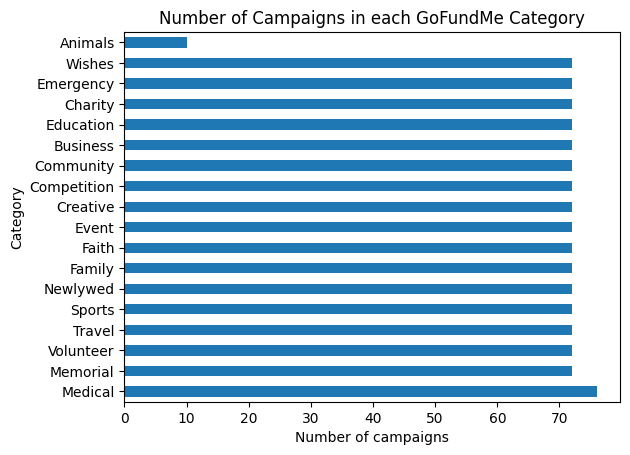

In [ ]:
df_categories['Category'].value_counts().plot(kind ='barh', title='Number of Campaigns in each GoFundMe Category', xlabel='Number of campaigns', ylabel='Category')

1. There are 18 categories that GoFundMe Campaigns are in. The most campaigns are in the "Medical" category, at around 75 campaigns. The least amount of campaigns are in the "Animals" cateogry, at a little under 20 campaigns.

<Axes: title={'center': 'Average Amount of Money Raised by GoFundMeCategory'}, xlabel='Average Money Raised ($)', ylabel='Category'>

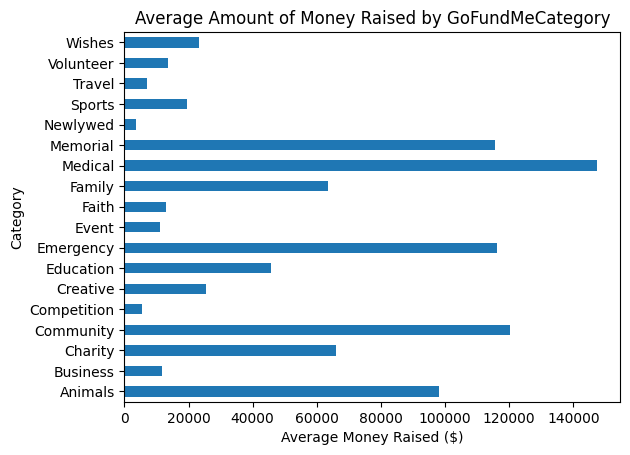

In [ ]:
category_means = df_categories.groupby('Category')['Amount_Raised'].mean()
category_means.plot(kind ='barh', title='Average Amount of Money Raised by GoFundMeCategory', xlabel='Average Money Raised ($)', ylabel='Category')

2. This is a distribution of the average amount of money raised in dollars for each GoFundMe category. The "Medical" category had the highest average of money raised at a around $150000. The "Competition" and "Newlywed" categories had the least average amount of money raised.

In [ ]:
df['Goal'] = df['Goal'].str.replace(',', '')
df['Goal'] = df['Goal'].str.replace('.', '')
df['Goal'] = df['Goal'].str.replace('M', '00000')
df['Goal'] = df['Goal'].str.replace('K', '00')
df['Goal'] = pd.to_numeric(df['Goal'])

In [ ]:
# asked chatGPT to create a function to do this because I need to do this for a lot of variables
def convert_gfm_hearts(value):
    # Remove any whitespace and convert to uppercase
    value = str(value).strip().upper()

    # Check for 'M' (millions) and 'K' (thousands) notation
    if 'M' in value:
        return float(value.replace("M", "")) * 1_000_000
    elif 'K' in value:
        return float(value.replace("K", "")) * 1_000
    else:
        return float(value)  # Directly convert if no suffix

In [ ]:
try:
    df['GFM_hearts'] = df['GFM_hearts'].apply(convert_gfm_hearts)
except ValueError as e:
    print("Conversion error:", e)

# Optional: Check for any remaining non-numeric values
df['GFM_hearts'] = pd.to_numeric(df['GFM_hearts'], errors='coerce')

# Display the converted column
print(df['GFM_hearts'].head())

0    12000.0
1     5700.0
2      836.0
3     4700.0
4     8900.0
Name: GFM_hearts, dtype: float64


In [ ]:
try:
    df['FB_Shares'] = df['FB_Shares'].apply(convert_gfm_hearts)
except ValueError as e:
    print("Conversion error:", e)

# Optional: Check for any remaining non-numeric values
df['FB_Shares'] = pd.to_numeric(df['FB_Shares'], errors='coerce')

# Display the converted column
print(df['FB_Shares'].head())

0    26000.0
1    12000.0
2     1800.0
3     9700.0
4     6400.0
Name: FB_Shares, dtype: float64


In [ ]:
df.head(10)

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donators,Length_of_Fundraising,FB_Shares,GFM_hearts,Text,Latitude,Longitude
0,0,https://www.gofundme.com/3ctqm-medical-bills-f...,Medical,0,92 Yr old Man Brutally Attacked.,"LOS ANGELES, CA",327345.0,15000.0,"12,167",1 month,26000.0,12000.0,Rodolfo Rodriguez needs your help today! 92 Yr...,34.052234,-118.243685
1,1,https://www.gofundme.com/olivia-stoy-bone-marr...,Medical,0,Olivia Stoy:Transplant & Liv it up!,"ASHLEY, IN",316261.0,1000000.0,"5,598",3 months,12000.0,5700.0,Thomas Stoy needs your help today! Olivia Stoy...,41.527273,-85.065523
2,2,https://www.gofundme.com/autologous-Tcell-Tran...,Medical,1,AUTOLOGOUS T CELL TRANSPLANT,"STATEN ISLAND, NY",241125.0,250000.0,841,2 months,1800.0,836.0,Philip Defonte needs your help today! AUTOLOGO...,40.579532,-74.150201
3,3,https://www.gofundme.com/a-chance-of-rebirth,Medical,1,A chance of rebirth,"DUBLIN, CA",237424.0,225000.0,"4,708",1 month,9700.0,4700.0,Sriram Kanniah needs your help today! A chance...,37.702152,-121.935792
4,4,https://www.gofundme.com/teamclaire,Medical,1,Claire Wineland Needs Our Help,"GARDEN GROVE, CA",236590.0,225000.0,"8,393",2 months,6400.0,8900.0,Melissa Yeager needs your help today! Claire W...,33.774269,-117.937995
5,5,https://www.gofundme.com/hannas-emergency-canc...,Medical,2,Hanna's Emergency Cancer Surgery,"SPRING LAKE, NJ",224718.0,250000.0,"2,705",5 months,3700.0,2700.0,Hanna Wilt needs your help today! Hanna's Emer...,40.153448,-74.028193
6,6,https://www.gofundme.com/brayden-belden,Medical,2,Brayden Belden Recovery Fund,"LAGUNA BEACH, CA",214147.0,275000.0,"2,700",6 months,10000.0,2700.0,Matt Belden needs your help today! Brayden Bel...,33.542719,-117.785357
7,7,https://www.gofundme.com/jacobburyrecovery,Medical,2,Jacob Bury Recovery Fund,"TACOMA, WA",209490.0,250000.0,924,1 month,2800.0,949.0,Jacob Bury needs your help today! Jacob Bury R...,47.252877,-122.444291
8,8,https://www.gofundme.com/Victoria-Gouletas-Wes...,Medical,3,When the Unthinkable Happens,"WESTPORT, CT",206726.0,250000.0,"2,052",5 months,3300.0,2000.0,Victoria Gouletas needs your help today! When ...,41.141472,-73.357905
9,9,https://www.gofundme.com/fight-like-the-averys,Medical,3,Fight like the Averys,"REDONDO BEACH, CA",195413.0,200000.0,"2,445",1 month,6000.0,2500.0,Duncan Avery needs your help today! Fight like...,33.849182,-118.388408


In [ ]:
df = df[~df['Category'].isin(['11525.0', '-75.3199035', '-73.9495823'])]

<Axes: title={'center': 'Average Fundraising Goal by GoFundMe Category'}, xlabel='Average Fundraising Goal ($)', ylabel='Category'>

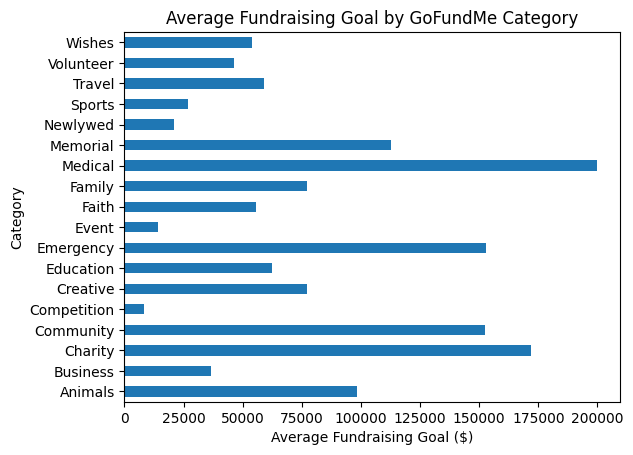

In [ ]:
goal_means = df.groupby('Category')['Goal'].mean()
goal_means.plot(kind = 'barh', title = 'Average Fundraising Goal by GoFundMe Category', xlabel='Average Fundraising Goal ($)', ylabel='Category')

3. Visually, there are similarities between the distribution of the average amount of money raised by category and the average fundraising goal by GoFundMe Category. We see that categories with higher average goals have higher amounts of money raised, and the same goes for categories with lower goals, so they raise less money. For example, the "Medical" category has the highest average fundraising goal at around $200,000 and the highest amount of money raised. The "Competition" category has a low goal and a low amount of money raised.

# Looking for outliers in shares and hearts



1.   `Select 3 catgories and create a boxplot of the FB shares and GFM hearts`
2.   `Plot the outliers in the boxplot`
1.   `Calculate the mean, median, mode, std deviation, and variance for the 3 categories' FB shares and GFM hearts`
3.   Summarize these results. What conclusions can you come to about these results?



1. Select categories and create visualizations.
2. Plot outliers within the boxplot.

In [ ]:
df_small = df[df['Category'].isin(['Medical', 'Family', 'Education'])]

In [ ]:
fig = px.box(df_small, x = "Category", y = "FB_Shares", title = "Distribution of FaceBook Shares for GoFundMe Posts by Category")
fig.update_xaxes(title_text="Category")
fig.update_yaxes(title_text="Number of Facebook Shares")
fig.show()

There seem to be outliers in the education category for GoFundMe posts. It seems, on average, that most education GoFundMe posts do not have a lot of FB shares. But, there are a few times wehre education GoFundMes have been shared significantly more than the average.

In [ ]:
fig = px.box(df_small, x = "Category", y = "GFM_hearts", title = "Distribution of GoFundMe Hearts by Category")
fig.update_xaxes(title_text="Category")
fig.update_yaxes(title_text="Number of GFM Hearts")
fig.show()

There seems to be one outlier for the Education category, where one post received a great deal more GFM hearts than the average of all the education category posts.

In addition, within the family category, there are a few outliers. We see that there is a lower average of GFM hearts for Family posts, at atound 598 hearts; however, a few posts far surpassed this. These posts have around 400-900 likes, which is significnatly outside of the typical spread of the data.

3. Calculate descriptive statisics

Medical Category GB Shares Descriptive Statistics

In [ ]:
# select only the medical GoFundMe posts
df_small_medical = df_small[df_small['Category'] == 'Medical']

df_small_medical['FB_Shares'] = pd.to_numeric(df_small_medical['FB_Shares'], errors='coerce')

mean_value = df_small_medical['FB_Shares'].mean()
median_value = df_small_medical['FB_Shares'].median()
mode_value = df_small_medical['FB_Shares'].mode()[0] if not df_small_medical['FB_Shares'].mode().empty else None
std_deviation = df_small_medical['FB_Shares'].std()
variance = df_small_medical['FB_Shares'].var()

In [ ]:
print(mean_value)
print(median_value)
print(mode_value)
print(std_deviation)
print(variance)

4032.0
2300.0
1300.0
4369.40896689701
19091734.72


Medical Category GFM Hearts Descriptive Statistics

In [ ]:
df_small_medical['GFM_hearts'] = pd.to_numeric(df_small_medical['GFM_hearts'], errors='coerce')


mean_value = df_small_medical['GFM_hearts'].mean()
median_value = df_small_medical['GFM_hearts'].median()
mode_value = df_small_medical['GFM_hearts'].mode()[0] if not df_small_medical['GFM_hearts'].mode().empty else None
std_deviation = df_small_medical['GFM_hearts'].std()
variance = df_small_medical['GFM_hearts'].var()

In [ ]:
print(mean_value)
print(median_value)
print(mode_value)
print(std_deviation)
print(variance)

1636.7894736842106
1050.0
1100.0
1822.3405266545876
3320924.99508772


Education Category FaceBook Shares Descriptive Statistics



In [ ]:
df_small_Education = df_small[df_small['Category'] == 'Education']

df_small_Education['FB_Shares'] = pd.to_numeric(df_small_Education['FB_Shares'], errors='coerce')

mean_value = df_small_Education['FB_Shares'].mean()
median_value = df_small_Education['FB_Shares'].median()
mode_value = df_small_Education['FB_Shares'].mode()[0] if not df_small_Education['FB_Shares'].mode().empty else None
std_deviation = df_small_Education['FB_Shares'].std()
variance = df_small_Education['FB_Shares'].var()

In [ ]:
print(mean_value)
print(median_value)
print(mode_value)
print(std_deviation)
print(variance)

831.9027777777778
459.5
3500.0
1106.05734461177
1223362.8495696401


Education Category GFM Hearts Descriptive Statistics

In [ ]:
df_small_Education['GFM_hearts'] = pd.to_numeric(df_small_Education['GFM_hearts'], errors='coerce')

mean_value = df_small_Education['GFM_hearts'].mean()
median_value = df_small_Education['GFM_hearts'].median()
mode_value = df_small_Education['GFM_hearts'].mode()[0] if not df_small_Education['GFM_hearts'].mode().empty else None
std_deviation = df_small_Education['GFM_hearts'].std()
variance = df_small_Education['GFM_hearts'].var()

In [ ]:
print(mean_value)
print(median_value)
print(mode_value)
print(std_deviation)
print(variance)

351.125
232.5
151.0
404.20127943361916
163378.67429577466


Family Category FaceBook Shares Descriptive Statistics

In [ ]:
df_small_Family = df_small[df_small['Category'] == 'Family']

df_small_Family['FB_Shares'] = pd.to_numeric(df_small_Family['FB_Shares'], errors='coerce')

mean_value = df_small_Family['FB_Shares'].mean()
median_value = df_small_Family['FB_Shares'].median()
mode_value = df_small_Family['FB_Shares'].mode()[0] if not df_small_Family['FB_Shares'].mode().empty else None
std_deviation = df_small_Family['FB_Shares'].std()
variance = df_small_Family['FB_Shares'].var()

In [ ]:
print(mean_value)
print(median_value)
print(mode_value)
print(std_deviation)
print(variance)

2642.1805555555557
1450.0
1100.0
4732.209037583952
22393802.375391234


Family Category GFM Hearts Descriptive Statistics

In [ ]:
df_small_Family['GFM_hearts'] = pd.to_numeric(df_small_Family['GFM_hearts'], errors='coerce')

mean_value = df_small_Family['GFM_hearts'].mean()
median_value = df_small_Family['GFM_hearts'].median()
mode_value = df_small_Family['GFM_hearts'].mode()[0] if not df_small_Family['GFM_hearts'].mode().empty else None
std_deviation = df_small_Family['GFM_hearts'].std()
variance = df_small_Family['GFM_hearts'].var()

In [ ]:
print(mean_value)
print(median_value)
print(mode_value)
print(std_deviation)
print(variance)

743.3333333333334
407.0
1000.0
895.790358397088
802440.3661971833


4. Summarize results.

The medical category has the greatest average of FB shares, followed by the family category, then the education category. In addition, the medical category has the greatest average of GoFundMe likes, followed by the family category, then the education category. This might be because of the urgency associated with getting medical treatments done, which means that money needs to be raised in a shorter period of time, leading to a faster spread of awareness by the people. The family category seems to have the greatest variance within the data, meaning that values are spread out more from the average number of GFM hearts within this category.

**Part 2 of the Homework**

1. Visualizations of GFM Heart by Category showing Unsuccessful and Successful Projects

In [ ]:
# here I created two dataframe: one with successful projects, one with unsuccessful projects

df['Amount_Raised'] = pd.to_numeric(df['Amount_Raised'], errors='coerce')
df['Goal'] = pd.to_numeric(df['Goal'], errors='coerce')
df_suc = df[df['Amount_Raised'] >= df['Goal']]
df_unsuc = df[df['Amount_Raised'] < df['Goal']]

In [ ]:
df_suc.head(5)

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donators,Length_of_Fundraising,FB_Shares,GFM_hearts,Text,Latitude,Longitude
0,0,https://www.gofundme.com/3ctqm-medical-bills-f...,Medical,0,92 Yr old Man Brutally Attacked.,"LOS ANGELES, CA",327345.0,15000.0,"12,167",1 month,26000.0,12000.0,Rodolfo Rodriguez needs your help today! 92 Yr...,34.052234,-118.243685
3,3,https://www.gofundme.com/a-chance-of-rebirth,Medical,1,A chance of rebirth,"DUBLIN, CA",237424.0,225000.0,"4,708",1 month,9700.0,4700.0,Sriram Kanniah needs your help today! A chance...,37.702152,-121.935792
4,4,https://www.gofundme.com/teamclaire,Medical,1,Claire Wineland Needs Our Help,"GARDEN GROVE, CA",236590.0,225000.0,"8,393",2 months,6400.0,8900.0,Melissa Yeager needs your help today! Claire W...,33.774269,-117.937995
12,12,https://www.gofundme.com/please-help-the-rober...,Medical,4,Please help the Robertson Family,"CARY, NC",169087.0,90000.0,883,2 months,2500.0,859.0,Julie Robertson needs your help today! Please ...,35.791540,-78.781117
15,15,https://www.gofundme.com/justice-for-pedro-dan...,Medical,5,Justice for Pedro Daniel Reyes.,"LOS ANGELES, CA",161337.0,150000.0,"4,873",5 months,12000.0,5300.0,John Patrick needs your help today! Justice fo...,34.052234,-118.243685


In [ ]:
df_unsuc.head(5)

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donators,Length_of_Fundraising,FB_Shares,GFM_hearts,Text,Latitude,Longitude
1,1,https://www.gofundme.com/olivia-stoy-bone-marr...,Medical,0,Olivia Stoy:Transplant & Liv it up!,"ASHLEY, IN",316261.0,1000000.0,"5,598",3 months,12000.0,5700.0,Thomas Stoy needs your help today! Olivia Stoy...,41.527273,-85.065523
2,2,https://www.gofundme.com/autologous-Tcell-Tran...,Medical,1,AUTOLOGOUS T CELL TRANSPLANT,"STATEN ISLAND, NY",241125.0,250000.0,841,2 months,1800.0,836.0,Philip Defonte needs your help today! AUTOLOGO...,40.579532,-74.150201
5,5,https://www.gofundme.com/hannas-emergency-canc...,Medical,2,Hanna's Emergency Cancer Surgery,"SPRING LAKE, NJ",224718.0,250000.0,"2,705",5 months,3700.0,2700.0,Hanna Wilt needs your help today! Hanna's Emer...,40.153448,-74.028193
6,6,https://www.gofundme.com/brayden-belden,Medical,2,Brayden Belden Recovery Fund,"LAGUNA BEACH, CA",214147.0,275000.0,"2,700",6 months,10000.0,2700.0,Matt Belden needs your help today! Brayden Bel...,33.542719,-117.785357
7,7,https://www.gofundme.com/jacobburyrecovery,Medical,2,Jacob Bury Recovery Fund,"TACOMA, WA",209490.0,250000.0,924,1 month,2800.0,949.0,Jacob Bury needs your help today! Jacob Bury R...,47.252877,-122.444291


In [ ]:
import seaborn as sns

Text(0.5, 1.05, 'GFM Hearts by Category for Unsuccessful Projects')

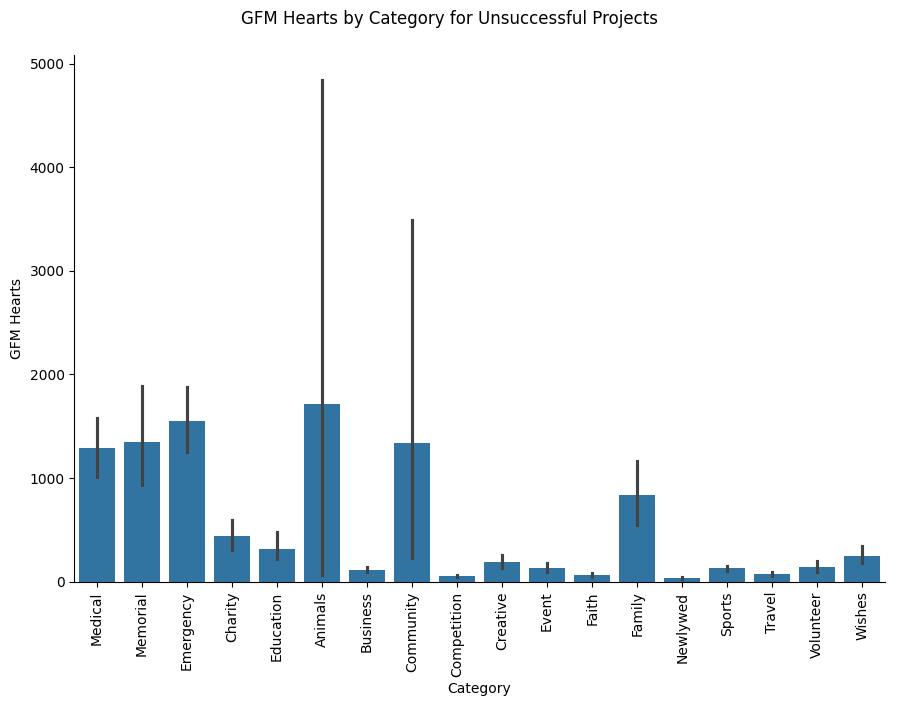

In [ ]:
g_unsuc = sns.catplot(x="Category", y="GFM_hearts", data=df_unsuc, kind="bar", height=6, aspect=1.5)
g_unsuc.set_xticklabels(rotation=90)
g_unsuc.set_axis_labels("Category", "GFM Hearts")
g_unsuc.fig.suptitle("GFM Hearts by Category for Unsuccessful Projects", y=1.05)

Text(0.5, 1.05, 'GFM Hearts by Category for Successful Projects')

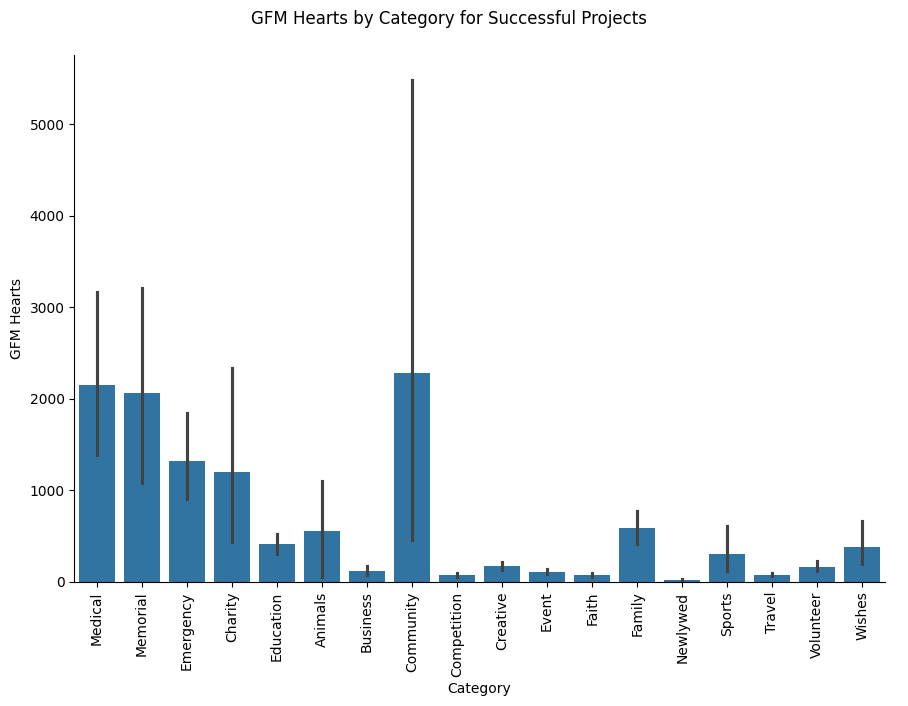

In [ ]:
g_suc = sns.catplot(x="Category", y="GFM_hearts", data=df_suc, kind="bar", height=6, aspect=1.5)
g_suc.set_xticklabels(rotation=90)
g_suc.set_axis_labels("Category", "GFM Hearts")
g_suc.fig.suptitle("GFM Hearts by Category for Successful Projects", y=1.05)

2. Visualizing the Relationship between Successful Projects in relation to Length of Fundraising

In [ ]:
df['Success'] = (df['Amount_Raised'] >= df['Goal']).astype(int)
df['Success'] = df['Success'].replace({0: 'Unsuccessful', 1: 'Successful'})
# I had to use chat gpt to figure out how to rename the 0 and 1 to make this reflect
# correctly in my legend. i was having difficulty using the code in the documentation to
# override these names.

In [ ]:
# convert length of fundraising variable into days. Here, I used Chat GPT
# to create a function to convert all lengths to days. I had issues at first
# because some lengths were saying "months" or "days," so the data was not
# normalized.
import re

def convert_to_days(length_str):
    if isinstance(length_str, str):
        # Extract the numeric part and the unit (days or month)
        match = re.match(r'(\d+)\s*(\w+)', length_str.strip().lower())
        if match:
            length = int(match.group(1))
            unit = match.group(2)

            # Convert based on the unit
            if unit in ['month', 'months']:  # If the unit is months
                return length * 30  # Convert months to days
            elif unit in ['day', 'days']:  # If the unit is days
                return length  # Leave days as is
    return None

df['Length_of_Fundraising'] = df['Length_of_Fundraising'].apply(lambda x: convert_to_days(x) if isinstance(x, str) else None)

In [ ]:
df.head(5)

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donators,Length_of_Fundraising,FB_Shares,GFM_hearts,Text,Latitude,Longitude,Success
0,0,https://www.gofundme.com/3ctqm-medical-bills-f...,Medical,0,92 Yr old Man Brutally Attacked.,"LOS ANGELES, CA",327345.0,15000.0,"12,167",30.0,26000.0,12000.0,Rodolfo Rodriguez needs your help today! 92 Yr...,34.052234,-118.243685,Successful
1,1,https://www.gofundme.com/olivia-stoy-bone-marr...,Medical,0,Olivia Stoy:Transplant & Liv it up!,"ASHLEY, IN",316261.0,1000000.0,"5,598",90.0,12000.0,5700.0,Thomas Stoy needs your help today! Olivia Stoy...,41.527273,-85.065523,Unsuccessful
2,2,https://www.gofundme.com/autologous-Tcell-Tran...,Medical,1,AUTOLOGOUS T CELL TRANSPLANT,"STATEN ISLAND, NY",241125.0,250000.0,841,60.0,1800.0,836.0,Philip Defonte needs your help today! AUTOLOGO...,40.579532,-74.150201,Unsuccessful
3,3,https://www.gofundme.com/a-chance-of-rebirth,Medical,1,A chance of rebirth,"DUBLIN, CA",237424.0,225000.0,"4,708",30.0,9700.0,4700.0,Sriram Kanniah needs your help today! A chance...,37.702152,-121.935792,Successful
4,4,https://www.gofundme.com/teamclaire,Medical,1,Claire Wineland Needs Our Help,"GARDEN GROVE, CA",236590.0,225000.0,"8,393",60.0,6400.0,8900.0,Melissa Yeager needs your help today! Claire W...,33.774269,-117.937995,Successful


In [ ]:
fig = px.histogram(df, x = "Length_of_Fundraising", color = "Success",
                   title = "Length of Fundraising by Success")
fig.update_xaxes(title_text="Length of Fundraising (days)")
fig.update_yaxes(title_text="Frequency of Successes")

In [ ]:
fig = px.box(df, x = "Success", y = "Length_of_Fundraising", color = "Success",
                   title = "Length of GoFundMe Fundraising by Success")
fig.update_xaxes(title_text="GFM Project Success")
fig.update_yaxes(title_text="Length of Fundraising (days)")

In [ ]:
fig = px.histogram(df, x="Length_of_Fundraising", color="Success",
                   title="Duration (in days) of Fundraising for GoFundMe Posts by Success",
                   barmode="group",
                   labels={"Length_of_Fundraising": "Length of Fundraising (days)",
                           "Success": "Success"})
fig.update_xaxes(title_text="Length of Fundraising (days)")
fig.update_yaxes(title_text="Frequency")
fig.show()

Looking at the first two distributions, we can see that that majority of posts seem to be split between being successful and unsuccessful. It almost seems as though there is no relationship between whether a GoFundMe post is successful or not based on the length it has been posted in days.

I wanted to explore this relationship further, so I created a side-by-side histogram.Here we can see that there are consistently more unsuccessful posts on average, regardless of the length of fundraising.

3. Visualizing the Relationship Between Successful Projects and FB Shares

In [ ]:
fig = px.box(df, x = "Success", y = "FB_Shares", color = "Success",
                   title = "Frequency of FaceBook Shares of GoFundMe Posts by Success")
fig.update_xaxes(title_text="GFM Project Success")
fig.update_yaxes(title_text="FB Shares")

In [ ]:
fig = px.histogram(df, x = "FB_Shares", color = "Success",
                   title = "Distribution of FaceBook Shares of GoFundMe Posts by Success")
fig.update_xaxes(title_text="Number of FaceBook Shares")
fig.update_yaxes(title_text="Frequency")

In [ ]:
# I chose to remove outliers to better visualize trends
df_filtered = df[df['FB_Shares'] <= 15000]

In [ ]:
fig = px.box(df_filtered, x = "Success", y = "FB_Shares", color = "Success",
                   title = "Frequency of FaceBook Shares of GoFundMe Posts by Success")
fig.update_xaxes(title_text="GFM Project Success Status")
fig.update_yaxes(title_text="FB Shares")

In [ ]:
fig = px.histogram(df_filtered, x="FB_Shares", color="Success",
                   title="Distribution of FaceBook Shares of GoFundMe Posts by Success")

fig.update_xaxes(title_text="Number of Facebook Shares")
fig.update_yaxes(title_text="Frequency")
fig.show()

In [ ]:
fig = px.histogram(df_filtered, x="FB_Shares", color="Success",
                   title="Distribution of FaceBook Shares of GoFundMe Posts by Success",
                   barmode="group",
                   labels={"Length_of_Fundraising": "Length of Fundraising (days)",
                           "Success": "Success Status"})
fig.update_xaxes(title_text="Number of FB Shares")
fig.update_yaxes(title_text="Frequency")
fig.show()

It seems as though majority of posts are unsuccessful. We do see, however, that the highest amount of unsuccessful posts are those with 0 FaceBook shares. Outliers within the boxplots illustrate that a few posts with a significant number of more facebook shares are successful.

4. Ratio of Success vs Unsuccessful projects by Category

In [ ]:
success_ratio = df.groupby(['Category', 'Success']).size().reset_index(name='Count')

fig = px.bar(success_ratio, x="Category", y="Count", color="Success",
             title="Successful:Unsuccessful Projects by GoFundMe Category",
             labels={"Count": "Number of Projects",
                     "Success": "Success Status"},
             barmode='stack')
fig.show()

It seems that majority of GoFundMe projects are unsuccessful, regardless of category. However, we do see that the most successful projects seem to be Event GoFundMe projects.